In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['car_ID'],inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df['enginelocation'].unique().tolist()

['front', 'rear']

In [9]:
df.CarName.iloc[0]

'alfa-romero giulia'

In [10]:
df.CarName.iloc[0].split()

['alfa-romero', 'giulia']

In [11]:
df.CarName.iloc[0].split()[0]

'alfa-romero'

In [12]:
df['CarCompanyName'] = df['CarName'].apply(lambda x:x.split()[0])

In [13]:
df['CarCompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
df.groupby('CarCompanyName')['CarCompanyName'].agg('count')


CarCompanyName
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarCompanyName, dtype: int64

In [15]:
df.drop(columns=['CarName'],inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
df["CarCompanyName"].replace("alfa-romero","alfa-romeo", inplace=True)
df["CarCompanyName"].replace("maxda","mazda", inplace=True)
df["CarCompanyName"].replace("Nissan","nissan", inplace=True)
df["CarCompanyName"].replace("porcshce","porsche", inplace=True)
df["CarCompanyName"].replace("toyouta","toyota", inplace=True)
df["CarCompanyName"].replace("porcshce","porsche", inplace=True)
df["CarCompanyName"].replace("vokswagen","volkswagen", inplace=True)
df["CarCompanyName"].replace("vw","volkswagen", inplace=True)

In [17]:
df['CarCompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
categorical_features = df.dtypes == object
list_categorical_features = df.columns[categorical_features].tolist()

In [19]:
list_categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompanyName']

In [20]:
df[list_categorical_features]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompanyName
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romeo
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [21]:
numerical_features = df.dtypes != object
list_numerical_features = df.columns[numerical_features].tolist()

In [22]:
list_numerical_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [23]:
df[list_numerical_features]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
df.drop(columns=['aspiration','doornumber','drivewheel','enginelocation','cylindernumber','fuelsystem','boreratio','stroke','compressionratio','enginesize'],inplace=True)
df.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,5500,24,30,13950.0,audi
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,5500,18,22,17450.0,audi


In [25]:
df.shape

(205, 15)

In [26]:
categorical_features1 = df.dtypes==object
list_categorical_features1 = df.columns[categorical_features1].tolist()

In [27]:
list_categorical_features1

['fueltype', 'carbody', 'enginetype', 'CarCompanyName']

In [28]:
numerical_features1 = df.dtypes!=object
list_numerical_features1 = df.columns[numerical_features1].tolist()

In [29]:
list_numerical_features1

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

[]

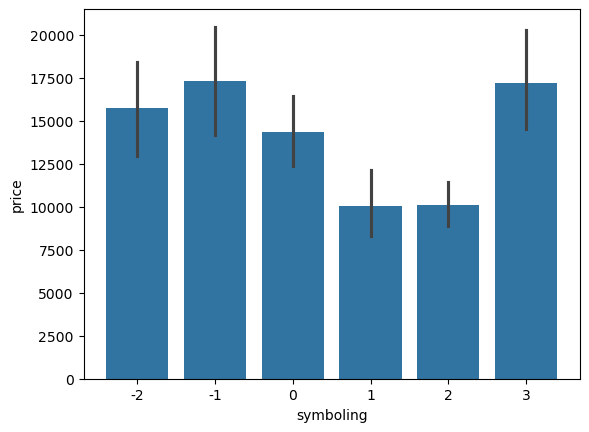

In [30]:
sns.barplot(x=df['symboling'],y=df['price'],data=df)
plt.plot()

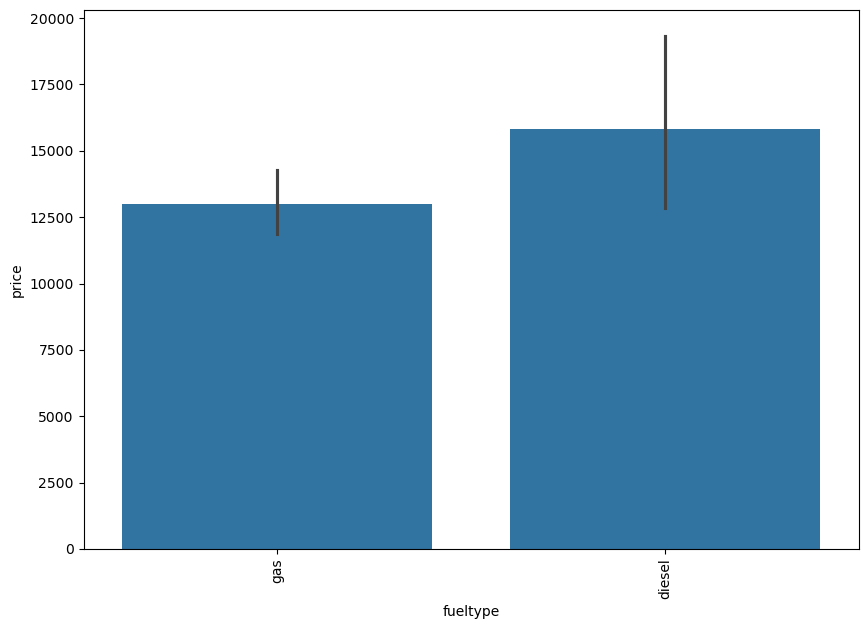

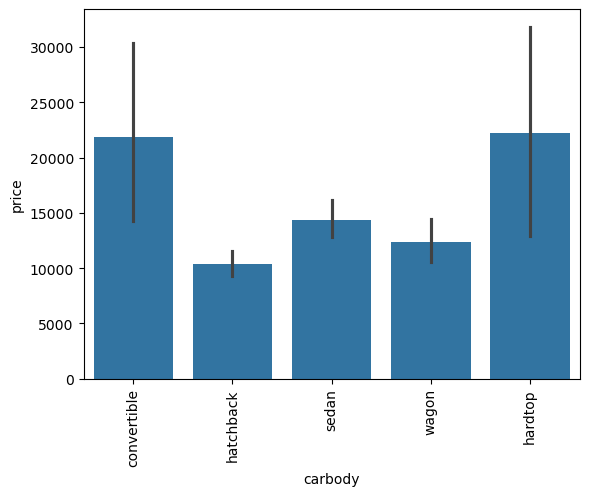

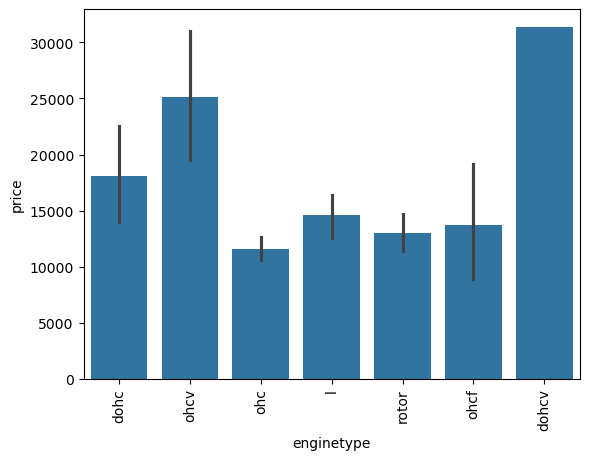

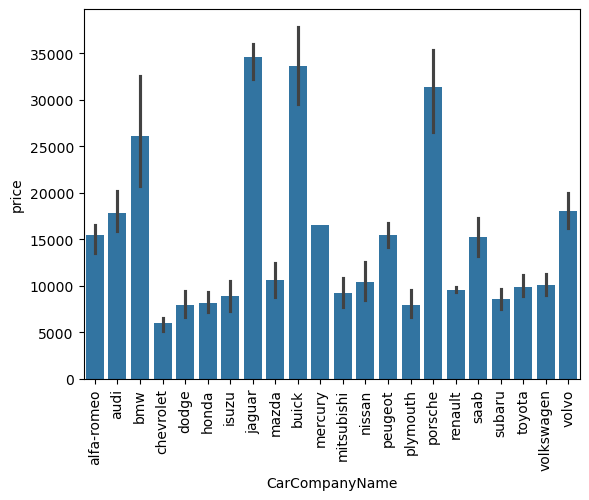

In [31]:
plt.figure(figsize=(10,7))
for col in list_categorical_features1:
    sns.barplot(x=df[col],y=df['price'],data=df)
    plt.xticks(rotation=90)
    plt.show()

In [32]:
df3 = df.copy()

In [33]:
df3.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,5500,24,30,13950.0,audi
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,5500,18,22,17450.0,audi


In [34]:
dummies = pd.get_dummies(df3[['fueltype','carbody','enginetype','CarCompanyName']])
dummies.head()

,fueltype_diesel,fueltype_gas,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df4 = pd.concat([df3,dummies],axis=1)
df4.head()

,symboling,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,horsepower,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,...,False,False,False,False,False,False,False,False,False,False
1,3,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,111,...,False,False,False,False,False,False,False,False,False,False
2,1,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,154,...,False,False,False,False,False,False,False,False,False,False
3,2,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,102,...,False,False,False,False,False,False,False,False,False,False
4,2,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,115,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df4.drop(columns=['fueltype','carbody','enginetype','CarCompanyName'],axis=1,inplace=True)
df4.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,horsepower,peakrpm,citympg,highwaympg,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,154,5000,19,26,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,102,5500,24,30,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,115,5500,18,22,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df4.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
wheelbase,88.6,88.6,94.5,99.8,99.4
carlength,168.8,168.8,171.2,176.6,176.6
carwidth,64.1,64.1,65.5,66.2,66.4
carheight,48.8,48.8,52.4,54.3,54.3
curbweight,2548,2548,2823,2337,2824
horsepower,111,111,154,102,115
peakrpm,5000,5000,5000,5500,5500
citympg,21,21,19,24,18
highwaympg,27,27,26,30,22


In [38]:
X = df4.drop(columns=['price'])
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,horsepower,peakrpm,citympg,highwaympg,...,CarCompanyName_nissan,CarCompanyName_peugeot,CarCompanyName_plymouth,CarCompanyName_porsche,CarCompanyName_renault,CarCompanyName_saab,CarCompanyName_subaru,CarCompanyName_toyota,CarCompanyName_volkswagen,CarCompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,111,5000,21,27,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,154,5000,19,26,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,102,5500,24,30,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,115,5500,18,22,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,114,5400,23,28,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,160,5300,19,25,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,134,5500,18,23,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,106,4800,26,27,...,False,False,False,False,False,False,False,False,False,True


In [39]:
y = df4.price
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8385908278663606

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81364735, 0.88723086, 0.93755937, 0.86843285, 0.95286602])

In [43]:
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params': {
                'copy_X' : [True,False],
                'fit_intercept' : [True,False],
                'n_jobs': [None,1,2,4],
                'positive': [True,False]
            }
        },
        
        'decision_tree' :{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.891947,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,decision_tree,0.839749,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [44]:
def predict_price(CarCompanyName, enginetype, carbody, fueltype, highwaympg, citympg, peakrpm, horsepower, curbweight, carheight, carwidth, carlength, wheelbase, symboling, X, lr_clf):
    CarCompanyName_index = np.where(X.columns == 'CarCompanyName_' + CarCompanyName)[0][0]
    enginetype_index = np.where(X.columns == 'enginetype_' + enginetype)[0][0]
    carbody_index = np.where(X.columns == 'carbody_' + carbody)[0][0]
    fueltype_index = np.where(X.columns == 'fueltype_' + fueltype)[0][0]

 
    x = np.zeros(len(X.columns))
    x[0] = symboling
    x[1] = wheelbase
    x[2] = carlength
    x[3] = carwidth
    x[4] = carheight
    x[5] = curbweight
    x[6] = horsepower
    x[7] = peakrpm
    x[8] = citympg
    x[9] = highwaympg
    
   
    if CarCompanyName_index >= 0:
        x[CarCompanyName_index] = 1
    if enginetype_index >= 0:
        x[enginetype_index] = 1
    if carbody_index >= 0:
        x[carbody_index] = 1
    if fueltype_index >= 0:
        x[fueltype_index] = 1

  
    return lr_clf.predict([x])[0]


In [45]:
predicted_price = predict_price('audi', 'dohc', 'convertible', 'gas', 27, 21, 5000, 111, 2548, 48.8, 64.1, 168.8, 88.6, 3, X, lr_clf)
print("Predicted price:", predicted_price)

Predicted price: 12973.16598564844


In [48]:
from sklearn.linear_model import LinearRegression
import pickle

data = pd.read_csv('CarPrice_Assignment.csv')

X = data[['horsepower', 'curbweight', 'highwaympg']]
y = data['price']

model = LinearRegression()
model.fit(X, y)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
